<a href="https://colab.research.google.com/github/hemanjalireddy/Polynomial_regression/blob/main/Making_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [3]:
data = pd.read_csv('/content/Position_Salaries.csv')
x = data.iloc[ : , 1:-1].values
y = data.iloc[: , -1].values

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Train the Linear Regression model on the whole dataset



In [7]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y)


LinearRegression()

In [13]:
print(linear_reg.score(x,y))
intercept = linear_reg.intercept_
coef = linear_reg.coef_

0.6690412331929895


In [16]:
y_hat1 = intercept + coef*x

## Training the Polynomial Regression model on the whole dataset

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =4)
x_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [31]:
lin_reg2.score(x_poly , y)

0.9973922891706615

In [32]:
coef2 =lin_reg2.coef_
intercept2 = lin_reg2.intercept_
print(coef2)
print(intercept2)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719737


## Visualising the Linear Regression model

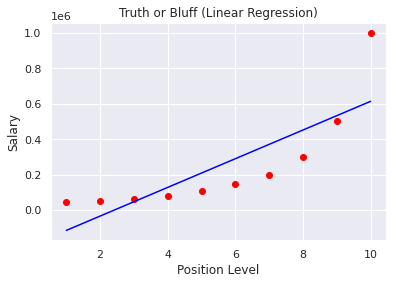

In [33]:
plt.scatter( x , y , color='red')
plt.plot (x , y_hat1 , color='blue' )
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising Polynomial Test results

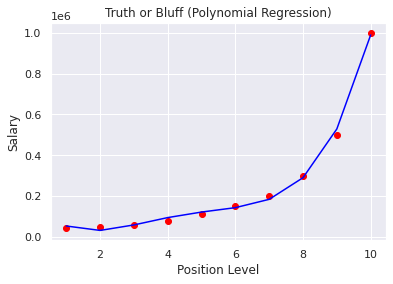

In [34]:
plt.scatter( x , y , color='red')
plt.plot (x , lin_reg2.predict(x_poly), color='blue' )
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression Results (for higher resolution and smoother curve)

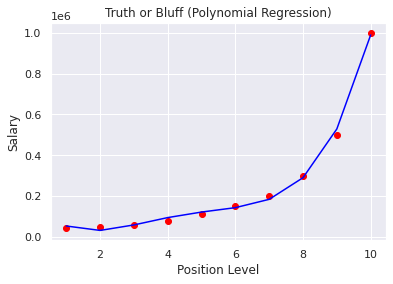

In [35]:
x_grid = np.arange(min(x) , max(x) , 0.1)
x_grid = x_grid.reshape((len(x_grid) , 1))
plt.scatter( x , y , color='red')
plt.plot (x , lin_reg2.predict(x_poly), color='blue' )
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Predicting a new result with Linear Regression

In [36]:
linear_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [38]:
values = [[1.0 , 6.5 , 6.5**2 , 6.5**3 , 6.5**4]]
lin_reg2.predict(values)

array([158862.45265155])

In [41]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])